Both time stepping methods solved $\mathbf{u}'=\mathbf{D}_{xx}\mathbf{u}$, for the matrix

In [1]:
include("../FNC.jl")
m = 40;  Dxx = FNC.diffper(m,[0,1])[3];

The eigenvalues of this martrix are real and negative.

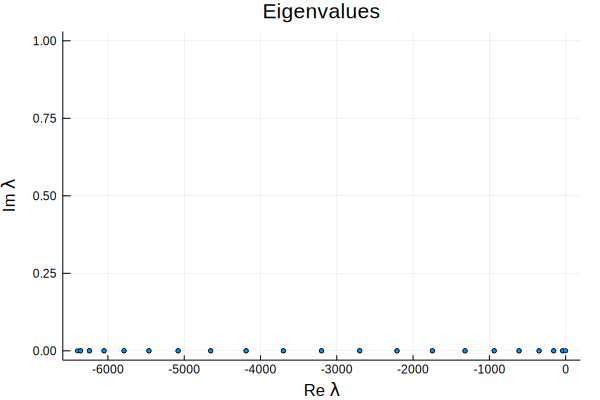

In [2]:
using LinearAlgebra
lambda = eigvals(Dxx)

using Plots
scatter(real(lambda),imag(lambda),m=2,
    xaxis=("Re \\lambda"),  yaxis=("Im \\lambda"),
    title="Eigenvalues",leg=:none)

The Euler method is absolutely stable in the region $|\zeta+1| \le 1$ in the complex plane:

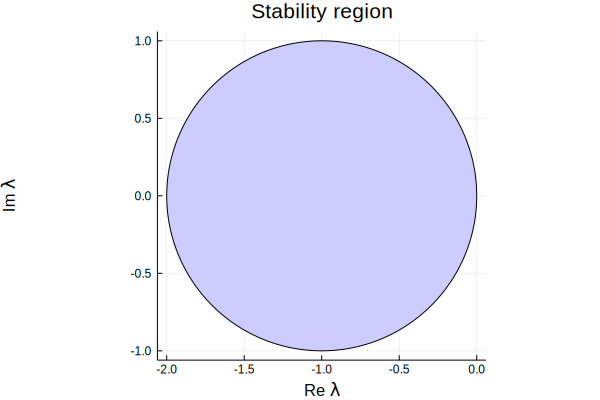

In [3]:
phi = 2pi*(0:360)/360
z = @.exp(1im*phi) - 1;   # unit circle shifted to the left by 1

plot(Shape(real(z),imag(z)),color=RGB(.8,.8,1),aspect_ratio=1,
    xaxis=("Re \\lambda"),  yaxis=("Im \\lambda"),
    title="Stability region",leg=:none) 

In order to get inside this region, we have to find $\tau$ such that $\lambda \tau > -2$ for all eigenvalues $\lambda$. This is an _upper_ bound on $\tau$. 

In [4]:
lambda_min = minimum(lambda)
@show max_tau = -2 / lambda_min;

max_tau = -2 / lambda_min = 0.00031250000000000017


Here we plot the resulting values of $\zeta=\lambda \tau$. 

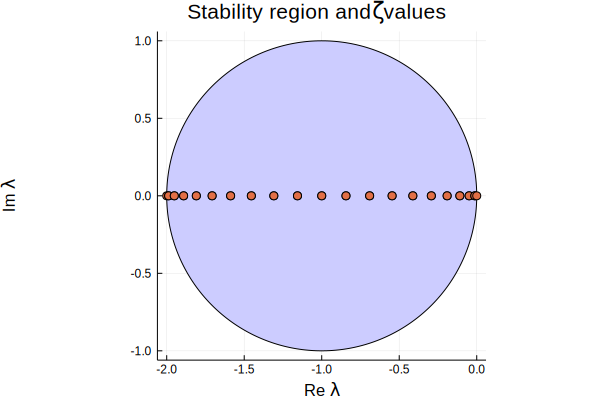

In [5]:
zeta = lambda*max_tau
scatter!(real(zeta),imag(zeta),
    title="Stability region and \\zeta  values")

In backward Euler, the region is $|\zeta-1|\ge 1$. Because they are all on the negative real axis, all of the $\zeta$ values will fit no matter what $\tau$ is chosen.

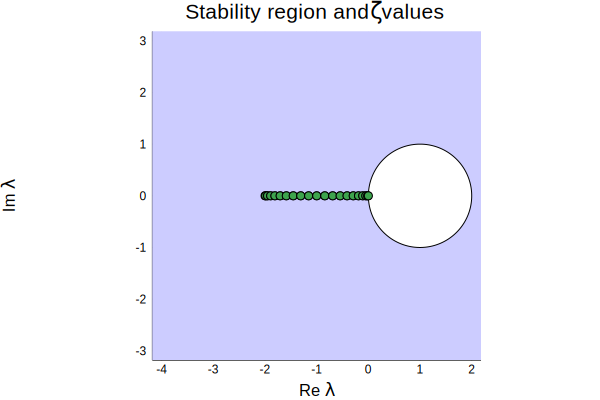

In [6]:
plot(Shape([-6,6,6,-6],[-6,-6,6,6]),color=RGB(.8,.8,1),aspect_ratio=1)
z = @.exp(1im*phi) + 1;   # unit circle shifted right by 1
plot!(Shape(real(z),imag(z)),color=:white)
scatter!(real(zeta),imag(zeta),
    xaxis=([-4,2],"Re \\lambda"),  yaxis=([-3,3],"Im \\lambda"),
    title="Stability region and \\zeta values",leg=:none)